In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True)

In [2]:
# Load the dataset
data = load_breast_cancer()
X, Y = data.data, data.target

# Reshape the data for PyTorch Tensors
Y = Y.reshape(Y.shape[0], 1)

In [3]:
print("Shape of training data : {}".format(X.shape))
print("Shape of label : {}".format(Y.shape))

Shape of training data : (569, 30)
Shape of label : (569, 1)


In [4]:
# Split the data into training and testing data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Training Size : {}, {}".format(Xtrain.shape, Ytrain.shape))
print("Test Size : {}, {}".format(Xtest.shape, Ytest.shape))

Training Size : (455, 30), (455, 1)
Test Size : (114, 30), (114, 1)


In [7]:
# Apply data transformation to put every data into the same scale

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [8]:
# Build a Pytorch model
model = nn.Linear(Xtrain.shape[1], 1)

# Define loss and optimization
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [9]:
# Convert each numpy to Pytorch Tensors
Xtrain = torch.from_numpy(Xtrain.astype(np.float32))
Xtest = torch.from_numpy(Xtest.astype(np.float32))

Ytrain = torch.from_numpy(Ytrain.astype(np.float32))
Ytest = torch.from_numpy(Ytest.astype(np.float32))


In [10]:
epochs = 1000
trainlosses = np.zeros(epochs)
testlosses = np.zeros(epochs)
trainacc = np.zeros(epochs)
testacc = np.zeros(epochs)

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(Xtrain)
    loss = criterion(outputs, Ytrain)
    
    # Backward and optimize
    loss.backward()
    optimizer.step()
    
    output_test = model(Xtest)
    loss_test = criterion(output_test, Ytest)
    
    # Track the losses
    trainlosses[epoch] = loss.item()
    testlosses[epoch] = loss_test.item()
    
    if (epoch + 1) % 50 == 0:
        print("Epoch : {}/{} Training Loss : {:.4f}, Test Loss : {:.4f}".format(epoch +1, epochs, loss.item(), loss_test.item()))
        
    

Epoch : 50/1000 Training Loss : 0.4578, Test Loss : 0.4670
Epoch : 100/1000 Training Loss : 0.3349, Test Loss : 0.3436
Epoch : 150/1000 Training Loss : 0.2691, Test Loss : 0.2799
Epoch : 200/1000 Training Loss : 0.2282, Test Loss : 0.2413
Epoch : 250/1000 Training Loss : 0.2002, Test Loss : 0.2154
Epoch : 300/1000 Training Loss : 0.1797, Test Loss : 0.1967
Epoch : 350/1000 Training Loss : 0.1642, Test Loss : 0.1825
Epoch : 400/1000 Training Loss : 0.1520, Test Loss : 0.1713
Epoch : 450/1000 Training Loss : 0.1421, Test Loss : 0.1623
Epoch : 500/1000 Training Loss : 0.1340, Test Loss : 0.1548
Epoch : 550/1000 Training Loss : 0.1271, Test Loss : 0.1485
Epoch : 600/1000 Training Loss : 0.1213, Test Loss : 0.1432
Epoch : 650/1000 Training Loss : 0.1163, Test Loss : 0.1386
Epoch : 700/1000 Training Loss : 0.1119, Test Loss : 0.1346
Epoch : 750/1000 Training Loss : 0.1081, Test Loss : 0.1312
Epoch : 800/1000 Training Loss : 0.1047, Test Loss : 0.1281
Epoch : 850/1000 Training Loss : 0.1016, 

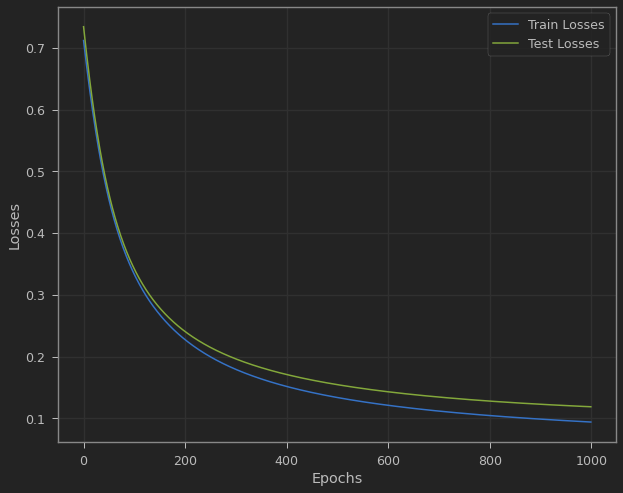

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(trainlosses, label="Train Losses")
plt.plot(testlosses, label="Test Losses")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()

In [14]:
# Get accuracy of the model
with torch.no_grad():
    ptrain = model(Xtrain)
    ptrain = (ptrain.numpy() > 0)
    
    ptest = model(Xtest)
    ptest = (ptest.numpy() > 0)
    
    
    trainacc = np.mean(Ytrain.numpy() == ptrain)
    testacc = np.mean(Ytest.numpy() == ptest)
    
    print("Train acc : {}, Test acc : {}".format(trainacc, testacc))

Train acc : 0.9846153846153847, Test acc : 0.9473684210526315
